# Name : Jung-Hyun Lee
# Student ID : 2018120206
# link : https://github.com/JungHyun-L/DataMining

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure

# define least square approximation function: $ \hat{x}=(A^{\rm T}A)^{-1}A^{\rm T}b$

In [2]:
def leastsquareApprox(xMat,yMat) :
    xTx= np.dot(xMat.T,xMat)
    middle=np.dot(np.linalg.inv(xTx),xMat.T)
    ws=np.dot(middle,yMat)
    return (ws)

# $\lambda$를 받아서 A를 만드는 함수

In [3]:
def makeA(la,row,col):
    
    # Dx 만들기
    Dx=np.zeros((row*(col-1),row*(col)))
    for i in range(row*(col-1)):
        Dx[i][i]=-1
        Dx[i][i+row]=1
    
    # Dy 만들기
    Dy=np.zeros((row*(col-1),row*(col)))
    k=0
    for i in range(row*(col-1)):
        if(i%(col-1)==0 and k>0):
            k+=1
        Dy[i][k]=-1
        Dy[i][k+1]=1
        k+=1
    
    # I 행렬
    I= np.identity(row*col)
    
    # square root lambda
    sqrtla= la**(1/2.0)
    
    # A만들기
    A=np.concatenate((I,sqrtla*Dx, sqrtla*Dy), axis=0)
    
    return(A)

In [14]:
file_image	= 'cau.jpg'

im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
(row, col)  = im.shape

noise_std   = 0.2 # try with varying noise standard deviation
noise       = np.random.normal(0, noise_std, (row, col))
im_noise    = im + noise


In [6]:
# lambda
la1 = 10**(-6)
la2 = 10**(-2)
la3 = 1

In [7]:
A1=makeA(la1,row,col)
A2=makeA(la2,row,col)
A3=makeA(la3,row,col)

In [8]:
# vectorization !
im_noise.shape
vec_im_noise= im_noise.flatten()
vec_im_noise.shape

zero_array=np.zeros(row*(col-1)*2)

# noise image와 0 vector 를 합쳐서 b를 만듬
b=np.concatenate((vec_im_noise,zero_array), axis=0)

In [9]:
v1=leastsquareApprox(A1,b)
v2=leastsquareApprox(A2,b)
v3=leastsquareApprox(A3,b)


In [10]:
im_recon1= v1.reshape(103,150)
im_recon2= v2.reshape(103,150)
im_recon3= v3.reshape(103,150)

# reconstruction image

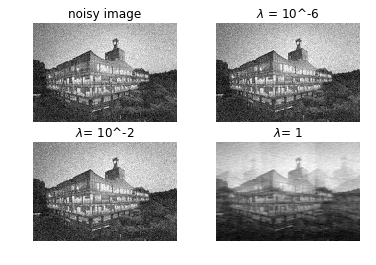

In [21]:
p1 = plt.subplot(2,2,1)
p1.set_title('noisy image')
plt.imshow(im_noise, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('$\lambda$ = 10^-6')
plt.imshow(im_recon1, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('$\lambda$= 10^-2')
plt.imshow(im_recon2, cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('$\lambda$= 1')
plt.imshow(im_recon3, cmap='gray')
plt.axis('off')

plt.show()

# reconstruction error

In [28]:
error1= np.linalg.norm(im - im_recon1)
error2= np.linalg.norm(im - im_recon2)
error3= np.linalg.norm(im - im_recon3)

Text(0,0.5,'error')

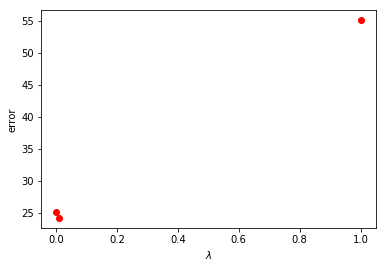

In [27]:
plt.plot([la1,la2, la3], [error1, error2, error3],'ro')
plt.xlabel('$\lambda$')
plt.ylabel('error')